<a href="https://colab.research.google.com/github/ayushbisht2001/MACHINE-LEARNING-WITH-TF/blob/main/Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [62]:
tf.compat.v1.disable_eager_execution()
x_data = np.linspace(0.0,10.0,1000000)
noise = np.random.randn(len(x_data))
noise

array([ 0.56987534, -0.4230705 ,  0.58330486, ...,  1.37223667,
        0.69985339,  2.70096063])

In [63]:
y_true = (1*x_data) + 5 + noise

In [64]:
x_df = pd.DataFrame(data = x_data,columns = ['X-Data'])

In [65]:
y_df = pd.DataFrame(data =y_true,columns=['Y'])

In [66]:
y_df.head()


,Y
0,5.569875
1,4.576939
2,5.583325
3,3.970178
4,4.269101


In [67]:
my_data = pd.concat([x_df,y_df],axis=1)

In [68]:
my_data.head()

,X-Data,Y
0,0.00000,5.569875
1,0.00001,4.576939
2,0.00002,5.583325
3,0.00003,3.970178
4,0.00004,4.269101


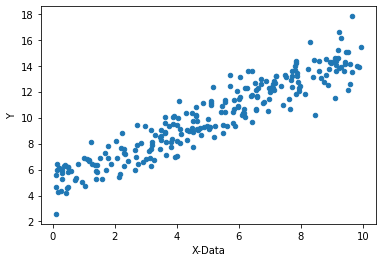

In [69]:
my_data.sample(n=250).plot(kind='scatter',x="X-Data",y="Y")

In [70]:
batch_size = 8

In [71]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [72]:
xph = tf.compat.v1.placeholder(tf.float32,[batch_size])
yph = tf.compat.v1.placeholder(tf.float32 , [batch_size])


In [73]:
y_model = m*xph + b

In [74]:
error =  tf.reduce_sum(tf.square(yph-y_model))

In [75]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [76]:
init = tf.compat.v1.global_variables_initializer()


In [77]:
with tf.compat.v1.Session() as sess:
  sess.run(init)
  batches = 100
  for i in range(batches):
    rand_ind = np.random.randint(len(x_data),size = batch_size)
    feed = {xph : x_data[rand_ind],yph : y_true[rand_ind]}
    sess.run(train,feed_dict = feed)
  model_m,model_b = sess.run([m,b])

In [78]:
y_hat = x_data*model_m + model_b

In [79]:
model_b

2.4265258

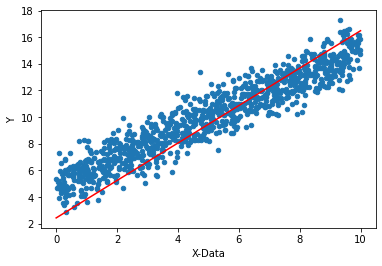

In [80]:
my_data.sample(n=1000).plot(kind='scatter',x='X-Data',y='Y')
plt.plot(x_data,y_hat,'r')

Till now, We have manually created our machine learning model . 

Now the same thing can be done using APIs, which is implemented below....

In [81]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

# estimator is basically use to call the different form of model.
estimator = tf.estimator.LinearRegressor(feature_columns = feat_cols)
 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpdpqm17xj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [82]:
from sklearn.model_selection import train_test_split


x_train , x_eval,y_train,y_eval = train_test_split(x_data,y_true,test_size =0.3,random_state=0)


input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None,shuffle = True)

train_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=100,shuffle = False)

eval_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=100,shuffle = False)

In [83]:
estimator.train(input_fn = input_func,steps = 1000)

train_metrics = estimator.evaluate(input_fn=train_input_func,steps = 1000)

eval_metrics = estimator.evaluate(input_fn=eval_input_func ,steps = 1000)

input_fu_predict = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle = False)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpdpqm17xj/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 111.9568, step = 0
INFO:tensorflow:global_step/sec: 619.472
INFO:tensorflow:loss = 3.9765236, step = 100 (0.170 sec)
INFO:tensorflow:global_step/sec: 702.533
INFO:tensorflow:loss = 2.5425563, step = 200 (0.138 sec)
INFO:tensorflow:global_step/sec: 705.294
INFO:tensorflow:loss = 2.6054523, step = 300 (0.139 sec)
INFO:tensorflow:global_step/sec: 562.762
INFO:tensorflow:loss = 1.6177698, step = 400 (0.184 sec)
INFO:tensorflow:global_step/sec: 752.705
INFO:tensorflow:loss = 2.0523167, step = 500 (0.126 sec)
INFO:tensorflow:global_step/sec: 704.409
INFO:tensorflow:loss = 3.3722835, step = 600 (0.148 sec)
INFO:tensorflow:global_ste

In [84]:
Predictions = [x['predictions'] for x in estimator.predict(input_fn=input_fu_predict)]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpdpqm17xj/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


In [85]:
Predictions

[array([3.9606943], dtype=float32),
 array([5.2380342], dtype=float32),
 array([6.5153737], dtype=float32),
 array([7.792713], dtype=float32),
 array([9.070053], dtype=float32),
 array([10.347392], dtype=float32),
 array([11.624731], dtype=float32),
 array([12.902071], dtype=float32),
 array([14.179412], dtype=float32),
 array([15.456751], dtype=float32)]

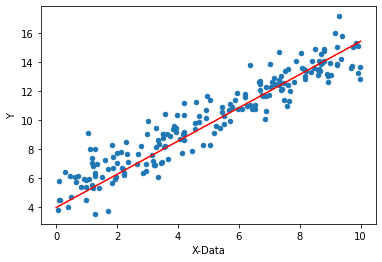

In [88]:
my_data.sample(n=200).plot(kind='scatter',x='X-Data',y='Y')
plt.plot(np.linspace(0,10,10),Predictions,'r')